# Imports



In [ ]:
import pandas as pd
import sqlite3

import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Conexão com o banco de dados


In [ ]:
conn = sqlite3.connect('consultas.db')
cursor = conn.cursor()

# Criação da tabela para armazenamento das consultas odontológicas

In [ ]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS consultas (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    paciente TEXT,
    especialidade TEXT,
    dia_semana TEXT,
    horario TEXT,
    data TEXT
)
''')

conn.commit()

print("OK")

OK


# Populando o banco

In [ ]:
especialidades = ['Ortodontia', 'Endodontia', 'Periodontia', 'Odontopediatria', 'Implantodontia']
dias_semana = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
horarios_disponiveis = [f'{hora:02d}:{minuto:02d}:00' for hora in range(8, 18) for minuto in (0, 30)]
datas = [datetime.now().date() - timedelta(days=i) for i in range(30)]

In [ ]:
for _ in range(100):  # Inserir 100 registros como exemplo
    paciente = f'Paciente_{random.randint(1, 100)}'
    especialidade = random.choice(especialidades)
    dia_semana = random.choice(dias_semana)
    horario = random.choice(horarios_disponiveis)
    data = random.choice(datas)

    cursor.execute('''
        INSERT INTO consultas (paciente, especialidade, dia_semana, horario, data)
        VALUES (?, ?, ?, ?, ?)
    ''', (paciente, especialidade, dia_semana, horario, data))

# Salvar as alterações
conn.commit()


# Leitura dos dados inseridos

In [ ]:
df_consultas = pd.read_sql_query("SELECT * FROM consultas", conn)
df_consultas.head()

,id,paciente,especialidade,dia_semana,horario,data
0,1,Paciente_67,Endodontia,Sábado,13:30:00,2024-10-25
1,2,Paciente_88,Periodontia,Segunda-feira,08:00:00,2024-10-29
2,3,Paciente_40,Odontopediatria,Quinta-feira,16:00:00,2024-11-03
3,4,Paciente_22,Periodontia,Quarta-feira,12:00:00,2024-11-05
4,5,Paciente_3,Implantodontia,Quarta-feira,08:00:00,2024-10-22


# Análise dos horários de maior demanda


In [ ]:
# função para contar o número de consultas em um horário
df_horarios = df_consultas.groupby('horario').size().reset_index(name='total_consultas')

# ordenar em ordem decrescente
df_horarios = df_horarios.sort_values(by='total_consultas', ascending=False)

#exibir os horários com maior demanda
df_horarios.head()

,horario,total_consultas
11,13:30:00,9
0,08:00:00,8
12,14:00:00,7
8,12:00:00,6
2,09:00:00,6


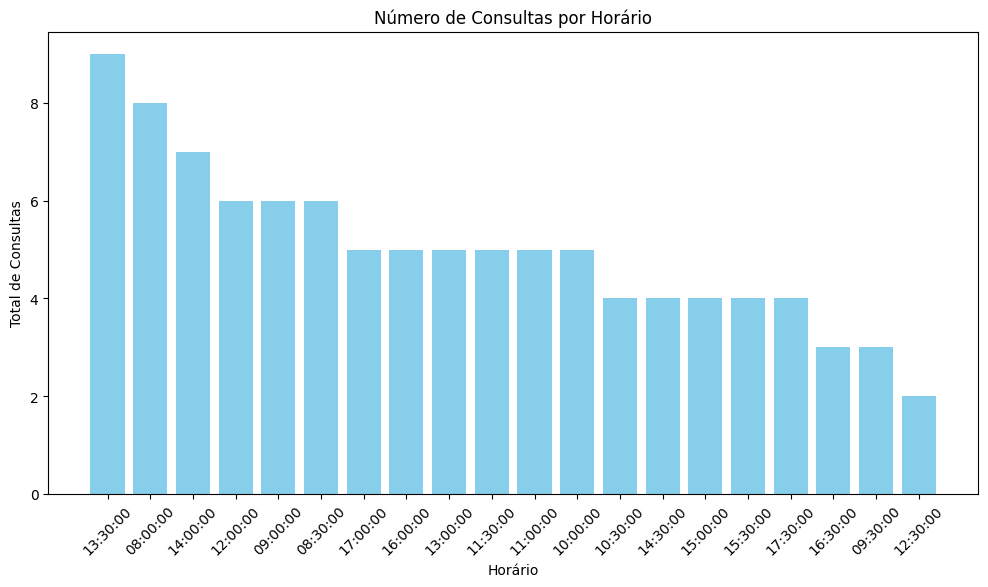

In [ ]:
# Exibição gráfica
plt.figure(figsize=(12,6))

plt.bar(df_horarios['horario'], df_horarios['total_consultas'], color='skyblue')

plt.xticks(rotation=45)

plt.title('Número de Consultas por Horário')
plt.xlabel('Horário')
plt.ylabel('Total de Consultas')

plt.show()

Implementação de um sistema de recomendação simples

In [ ]:
def recomendar_horario(dia_semana, especialidade):
# Filtrar consultas pelo dia da semana e especialidade
consultas_filtradas = df_consultas[(df_consultas['dia_semana'] == dia_semana) &
(df_consultas['especialidade'] == especialidade)]

# Contar a frequência de cada horário
frequencia_horarios = consultas_filtradas['horario'].value_counts()

# Identificar os horários menos ocupados (assumindo que são os preferidos)
horarios_recomendados = frequencia_horarios.nsmallest(3)

return horarios_recomendados

# Exemplo de uso do sistema de recomendação
dia = 'Segunda-feira'
especialidade = 'Ortodontia'
recomendacoes = recomendar_horario(dia, especialidade)
print(f"Horários recomendados para {especialidade} na {dia}:")
print(recomendacoes)

# Testando para diferentes dias e especialidades
dias_semana = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
especialidades = ['Ortodontia', 'Endodontia', 'Periodontia', 'Odontopediatria', 'Implantodontia']

for dia in dias_semana:
for esp in especialidades:
recomendacoes = recomendar_horario(dia, esp)
print(f"\nHorários recomendados para {esp} na {dia}:")
print(recomendacoes)